# Notebook for analysis of Lia's aims for undergrad dissertation 

In [4]:
library(psych)
library(ggplot2)
library(reshape)
library(dplyr)
library(lme4)
library(nlme)

In [5]:
data<-read.table("~/Google Drive/Lias_stuff/data/variables_interest.csv", sep=",", header=T, fill=T)

In [6]:
dim(data)

[1] 73 56

In [7]:
head(data)

PID,Assigned.Beverage,Sweet,w1_BMI,w1_BMI_status,age,ethnicity,race,gender,adlib_assigned,⋯,b5_tpbq_assigned_aa,b5_tpbq_assigned_ia,b5_tpbq_assigned_sn,b5_tpbq_assigned_pbc,b5_tpbq_assigned_bi,w2_tpbq_assigned_aa,w2_tpbq_assigned_ia,w2_tpbq_assigned_sn,w2_tpbq_assigned_pbc,w2_tpbq_assigned_bi
bbx_001,UCO,0,21.07869,0,22,0,2,0,0.1,⋯,NA,NA,NA,NA,NA,3.000000,5.000000,3.333333,4.666667,1.5
bbx_002,USL,0,34.55076,1,21,0,5,0,0.0,⋯,NA,NA,NA,NA,NA,4.333333,4.666667,4.666667,4.666667,7.0
bbx_003,USL,0,21.39481,0,19,0,5,0,0.0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
bbx_004,SL,1,20.37629,0,22,0,5,0,-0.2,⋯,2.666667,3.333333,3.333333,4.666667,5.5,3.000000,3.666667,3.333333,2.666667,5.0
bbx_005,CO,1,22.85640,0,20,0,5,0,2.3,⋯,3.000000,4.333333,4.666667,4.666667,1.5,3.000000,4.666667,5.000000,4.666667,7.0
bbx_006,USL,0,21.77146,0,21,0,5,0,97.6,⋯,3.000000,4.000000,3.333333,4.666667,5.0,3.333333,4.000000,3.333333,4.666667,5.5


## Code Dictionary
PID: bbx participant	
Assigned Beverage: Character type, UCO, USL, CO, SL

Sweet: assigned beverage sweetness, 1=SL/CO (sweet), 0=USL/UCO (unsweet)

w1_BMI: continuous, BMI based off W1 behavioral visit height and weight

w1_BMI_status: dichotomous, 0=below 25 BMI, 1=above 25 BMI

Age: continuous

Ethnicity: Hispanic/Latino, 0=no, 1=yes
Race: 
* 1      -american Indian or Alaska native
* 1-    Asian
* 2-    Black or African American
* 3-    Native Hawaiian or other specific islander
* 4-    White
* 5-    Middle eastern or northern African
* 6-    Other ____

Gender: 0=Male, 1=Female

### Naming breakdown:
* time data was taken at (w1= behavioral 1, b5= bevshop 5, w2= behavioral 2)
* TPB questionnaire
* Beverage (ssb=soda, usb=water, assigned= assigned beverage)
* TPB construct (aa= affective attitude, ia= instrumental attitude, sn= subjective norm, pbc= perceived behavioral control, bi= behavioral intention)
* i.e. w1_tpbq_ssb_aa = first behavioral, soda’s affective attitude score (mean of related questions)

## Variables of interest
#### Dependent variable
TPB constructs: 
* affective attitude (AA)
* instrumental attitude (IA)
* subjective norms (SN)
* perceived behavioral control (BC)
* behavioral intention (BI)
#### Independent variable
* Assigned Beverage Sweetness
#### Covariates
* BMI: continuous
* Age
* Gender
* Race
* Ethnicity
#### random effects
* Time
* PID



## Split dataset by the construct

In [8]:
names(data)

[1] "PID"                  "Assigned.Beverage"    "Sweet"               
 [4] "w1_BMI"               "w1_BMI_status"        "age"                 
 [7] "ethnicity"            "race"                 "gender"              
[10] "adlib_assigned"       "adlib_alt"            "w1_tpbq_ssb_aa"      
[13] "w1_tpbq_ssb_ia"       "w1_tpbq_ssb_sn"       "w1_tpbq_ssb_pbc"     
[16] "w1_tpbq_ssb_bi"       "b5_tpbq_ssb_aa"       "b5_tpbq_ssb_ia"      
[19] "b5_tpbq_ssb_sn"       "b5_tpbq_ssb_pbc"      "b5_tpbq_ssb_bi"      
[22] "w2_tpbq_ssb_aa"       "w2_tpbq_ssb_ia"       "w2_tpbq_ssb_sn"      
[25] "w2_tpbq_ssb_pbc"      "w2_tpbq_ssb_bi"       "w1_tpbq_usb_aa"      
[28] "w1_tpbq_usb_ia"       "w1_tpbq_usb_sn"       "w1_tpbq_usb_pbc"     
[31] "w1_tpbq_usb_bi"       "b5_tpbq_usb_aa"       "b5_tpbq_usb_ia"      
[34] "b5_tpbq_usb_sn"       "b5_tpbq_usb_pbc"      "b5_tpbq_usb_bi"      
[37] "w2_tpbq_usb_aa"       "w2_tpbq_usb_ia"       "w2_tpbq_usb_sn"      
[40] "w2_tpbq_usb_pbc"      "w2_tpbq_usb_bi"       "w1_tpbq_assigned_aa" 
[43] "w1_tpbq_assigned_ia"  "w1_tpbq_assigned_sn"  "w1_tpbq_assigned_pbc"
[46] "w1_tpbq_assigned_bi"  "b5_tpbq_assigned_aa"  "b5_tpbq_assigned_ia" 
[49] "b5_tpbq_assigned_sn"  "b5_tpbq_assigned_pbc" "b5_tpbq_assigned_bi" 
[52] "w2_tpbq_assigned_aa"  "w2_tpbq_assigned_ia"  "w2_tpbq_assigned_sn" 
[55] "w2_tpbq_assigned_pbc" "w2_tpbq_assigned_bi"

In [9]:
AA <- data %>% group_by(Sweet) %>% 
  select('PID','w1_BMI', 'w1_BMI_status', 
         'age', 'ethnicity', 'race', 
         'gender', 'w1_tpbq_ssb_aa', 
         'b5_tpbq_ssb_aa', 'w2_tpbq_ssb_aa')

Adding missing grouping variables: `Sweet`


In [10]:
dim(AA)
names(AA)

[1] 73 11

[1] "Sweet"          "PID"            "w1_BMI"         "w1_BMI_status" 
 [5] "age"            "ethnicity"      "race"           "gender"        
 [9] "w1_tpbq_ssb_aa" "b5_tpbq_ssb_aa" "w2_tpbq_ssb_aa"

In [11]:
IA <- data %>% group_by(Sweet) %>% 
  select('PID','w1_BMI', 'w1_BMI_status', 
         'age', 'ethnicity', 'race', 
         'gender', 'w1_tpbq_ssb_ia', 
         'b5_tpbq_ssb_ia', 'w2_tpbq_ssb_ia')

Adding missing grouping variables: `Sweet`


In [12]:
dim(IA)
names(IA)

[1] 73 11

[1] "Sweet"          "PID"            "w1_BMI"         "w1_BMI_status" 
 [5] "age"            "ethnicity"      "race"           "gender"        
 [9] "w1_tpbq_ssb_ia" "b5_tpbq_ssb_ia" "w2_tpbq_ssb_ia"

In [13]:
SN <- data %>% group_by(Sweet) %>% 
  select('PID','w1_BMI', 'w1_BMI_status', 
         'age', 'ethnicity', 'race', 
         'gender', 'w1_tpbq_ssb_sn', 
         'b5_tpbq_ssb_sn', 'w2_tpbq_ssb_sn')
dim(SN)
names(SN)

Adding missing grouping variables: `Sweet`


[1] 73 11

[1] "Sweet"          "PID"            "w1_BMI"         "w1_BMI_status" 
 [5] "age"            "ethnicity"      "race"           "gender"        
 [9] "w1_tpbq_ssb_sn" "b5_tpbq_ssb_sn" "w2_tpbq_ssb_sn"

In [14]:
BC <- data %>% group_by(Sweet) %>% 
  select('PID','w1_BMI', 'w1_BMI_status', 
         'age', 'ethnicity', 'race', 
         'gender', 'w1_tpbq_ssb_pbc', 
         'b5_tpbq_ssb_pbc', 'w2_tpbq_ssb_pbc')
dim(BC)
names(BC)

Adding missing grouping variables: `Sweet`


[1] 73 11

[1] "Sweet"           "PID"             "w1_BMI"          "w1_BMI_status"  
 [5] "age"             "ethnicity"       "race"            "gender"         
 [9] "w1_tpbq_ssb_pbc" "b5_tpbq_ssb_pbc" "w2_tpbq_ssb_pbc"

In [15]:
BI <- data %>% group_by(Sweet) %>% 
  select('PID','w1_BMI', 'w1_BMI_status', 
         'age', 'ethnicity', 'race', 
         'gender', 'w1_tpbq_ssb_bi', 
         'b5_tpbq_ssb_bi', 'w2_tpbq_ssb_bi')
dim(BI)
names(BI)

Adding missing grouping variables: `Sweet`


[1] 73 11

[1] "Sweet"          "PID"            "w1_BMI"         "w1_BMI_status" 
 [5] "age"            "ethnicity"      "race"           "gender"        
 [9] "w1_tpbq_ssb_bi" "b5_tpbq_ssb_bi" "w2_tpbq_ssb_bi"

## Melt the datasets

In [16]:
names(AA)

[1] "Sweet"          "PID"            "w1_BMI"         "w1_BMI_status" 
 [5] "age"            "ethnicity"      "race"           "gender"        
 [9] "w1_tpbq_ssb_aa" "b5_tpbq_ssb_aa" "w2_tpbq_ssb_aa"

In [17]:
AA <- as.data.frame(AA)
AA_long<-melt(data = AA,
              id.vars = c('PID', 'Sweet','w1_BMI', 'w1_BMI_status', 'age', 'ethnicity', 'race', 'gender'),
              measure.vars = c('w1_tpbq_ssb_aa', 'b5_tpbq_ssb_aa', 'w2_tpbq_ssb_aa'))

In [18]:
names(AA_long)<-c(
    'PID', 'Sweet','w1_BMI', 'w1_BMI_status', 'age', 'ethnicity', 'race', 'gender', 'time_bev','attitude')
dim(AA_long)
head(AA_long)

[1] 219  10

PID,Sweet,w1_BMI,w1_BMI_status,age,ethnicity,race,gender,time_bev,attitude
bbx_001,0,21.07869,0,22,0,2,0,w1_tpbq_ssb_aa,5.666667
bbx_002,0,34.55076,1,21,0,5,0,w1_tpbq_ssb_aa,5.666667
bbx_003,0,21.39481,0,19,0,5,0,w1_tpbq_ssb_aa,5.666667
bbx_004,1,20.37629,0,22,0,5,0,w1_tpbq_ssb_aa,3.000000
bbx_005,1,22.85640,0,20,0,5,0,w1_tpbq_ssb_aa,2.333333
bbx_006,0,21.77146,0,21,0,5,0,w1_tpbq_ssb_aa,1.666667


## Gathering the datasets

In [19]:
DL <- list('aa' = AA, 'ia' = IA, 'sn' = SN, 'bc' = BC, 'bi'= BI)

In [20]:
DL

Sweet,PID,w1_BMI,w1_BMI_status,age,ethnicity,race,gender,w1_tpbq_ssb_aa,b5_tpbq_ssb_aa,w2_tpbq_ssb_aa
0,bbx_001,21.07869,0,22,0,2,0,5.666667,NA,3.0000000
0,bbx_002,34.55076,1,21,0,5,0,5.666667,NA,4.3333333
0,bbx_003,21.39481,0,19,0,5,0,5.666667,5.666667,NA
1,bbx_004,20.37629,0,22,0,5,0,3.000000,3.000000,2.3333333
1,bbx_005,22.85640,0,20,0,5,0,2.333333,3.000000,2.3333333
0,bbx_006,21.77146,0,21,0,5,0,1.666667,3.000000,2.0000000
0,bbx_007,24.59737,0,24,0,5,1,3.000000,4.000000,4.0000000
1,bbx_008,19.69124,0,22,0,5,0,6.666667,7.000000,7.0000000
0,bbx_009,20.93061,0,19,0,5,0,3.000000,3.000000,2.6666667
1,bbx_010,25.08503,1,23,0,5,0,3.000000,2.000000,1.6666667


In [21]:
lengthen <- function(x){
    x <- as.data.frame(x)
    names(x)<-c('Sweet', 'PID', 'w1_BMI', 'w1_BMI_status', 'age', 'ethnicity', 'race', 'gender', 'T1', 'T2', 'T3')
    x_long<-melt(data = x,
              id.vars = c('PID', 'Sweet','w1_BMI', 'w1_BMI_status', 'age', 'ethnicity', 'race', 'gender'),
              measure.vars = c('T1', 'T2', 'T3'))
    names(x_long)<-c('PID', 'Sweet','w1_BMI', 'w1_BMI_status', 'age', 'ethnicity', 'race', 'gender', 'time','measure')
    return(x_long)
}

In [22]:
DL_long <- lapply(DL, lengthen)

In [23]:
DL_long

PID,Sweet,w1_BMI,w1_BMI_status,age,ethnicity,race,gender,time,measure
bbx_001,0,21.07869,0,22,0,2,0,T1,5.666667
bbx_002,0,34.55076,1,21,0,5,0,T1,5.666667
bbx_003,0,21.39481,0,19,0,5,0,T1,5.666667
bbx_004,1,20.37629,0,22,0,5,0,T1,3.000000
bbx_005,1,22.85640,0,20,0,5,0,T1,2.333333
bbx_006,0,21.77146,0,21,0,5,0,T1,1.666667
bbx_007,0,24.59737,0,24,0,5,1,T1,3.000000
bbx_008,1,19.69124,0,22,0,5,0,T1,6.666667
bbx_009,0,20.93061,0,19,0,5,0,T1,3.000000
bbx_010,1,25.08503,1,23,0,5,0,T1,3.000000


## Model with correlated random effects
http://lme4.r-forge.r-project.org/book/Ch4.pdf

In [24]:
dim(AA)
73*3
dim(AA_long)

[1] 73 11

[1] 219

[1] 219  10

In [25]:
AA_long

PID,Sweet,w1_BMI,w1_BMI_status,age,ethnicity,race,gender,time_bev,attitude
bbx_001,0,21.07869,0,22,0,2,0,w1_tpbq_ssb_aa,5.666667
bbx_002,0,34.55076,1,21,0,5,0,w1_tpbq_ssb_aa,5.666667
bbx_003,0,21.39481,0,19,0,5,0,w1_tpbq_ssb_aa,5.666667
bbx_004,1,20.37629,0,22,0,5,0,w1_tpbq_ssb_aa,3.000000
bbx_005,1,22.85640,0,20,0,5,0,w1_tpbq_ssb_aa,2.333333
bbx_006,0,21.77146,0,21,0,5,0,w1_tpbq_ssb_aa,1.666667
bbx_007,0,24.59737,0,24,0,5,1,w1_tpbq_ssb_aa,3.000000
bbx_008,1,19.69124,0,22,0,5,0,w1_tpbq_ssb_aa,6.666667
bbx_009,0,20.93061,0,19,0,5,0,w1_tpbq_ssb_aa,3.000000
bbx_010,1,25.08503,1,23,0,5,0,w1_tpbq_ssb_aa,3.000000


In [26]:
intercept<-gls(attitude~1, data=AA_long, method="ML", na.action=na.exclude)

In [27]:
randomIntercept<-lme(
    attitude~1, data=AA_long, random=~1|PID, method="ML", na.action=na.exclude, control=list(opt="optim"))


In [28]:
timeRI<-update(randomIntercept, .~.+time_bev)

In [29]:
timeRS<-update(timeRI, random=~time_bev|PID)

In [30]:
summary(timeRS)
anova(timeRS)

Linear mixed-effects model fit by maximum likelihood
 Data: AA_long 
       AIC      BIC    logLik
  670.9653 703.8983 -325.4826

Random effects:
 Formula: ~time_bev | PID
 Structure: General positive-definite, Log-Cholesky parametrization
                       StdDev    Corr         
(Intercept)            1.3898844 (Intr) t_5___
time_bevb5_tpbq_ssb_aa 1.0387854 -0.404       
time_bevw2_tpbq_ssb_aa 1.2759339 -0.342  0.715
Residual               0.5123193              

Fixed effects: attitude ~ time_bev 
                           Value Std.Error  DF   t-value p-value
(Intercept)             3.958333 0.1759038 125 22.502827  0.0000
time_bevb5_tpbq_ssb_aa  0.081113 0.1571419 125  0.516175  0.6066
time_bevw2_tpbq_ssb_aa -0.082506 0.1816338 125 -0.454246  0.6504
 Correlation: 
                       (Intr) t_5___
time_bevb5_tpbq_ssb_aa -0.432       
time_bevw2_tpbq_ssb_aa -0.384  0.621

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.

,numDF,denDF,F-value,p-value
(Intercept),1,125,643.8806662,0.0000000
time_bev,2,125,0.6225826,0.5382123


In [31]:
timeCov<-update(timeRS, .~.+Sweet)
summary(timeCov)
anova(timeCov)

Linear mixed-effects model fit by maximum likelihood
 Data: AA_long 
       AIC      BIC   logLik
  672.8919 709.1183 -325.446

Random effects:
 Formula: ~time_bev | PID
 Structure: General positive-definite, Log-Cholesky parametrization
                       StdDev   Corr         
(Intercept)            1.389379 (Intr) t_5___
time_bevb5_tpbq_ssb_aa 1.038587 -0.405       
time_bevw2_tpbq_ssb_aa 1.276073 -0.343  0.714
Residual               0.512270              

Fixed effects: attitude ~ time_bev + Sweet 
                           Value Std.Error  DF   t-value p-value
(Intercept)             4.004068 0.2452472 125 16.326660  0.0000
time_bevb5_tpbq_ssb_aa  0.081161 0.1575197 125  0.515242  0.6073
time_bevw2_tpbq_ssb_aa -0.082967 0.1821139 125 -0.455579  0.6495
Sweet                  -0.084434 0.3147462  70 -0.268260  0.7893
 Correlation: 
                       (Intr) t_5___ t_2___
time_bevb5_tpbq_ssb_aa -0.310              
time_bevw2_tpbq_ssb_aa -0.282  0.621       
Sweet          

,numDF,denDF,F-value,p-value
(Intercept),1,125,641.33048931,0.0000000
time_bev,2,125,0.61968103,0.5397608
Sweet,1,70,0.07196355,0.7892880


In [32]:
anova(intercept, randomIntercept, timeRI, timeRS, timeCov)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
intercept,"gls(model = attitude ~ 1, data = AA_long, method = ""ML"", na.action = na.exclude)",1,2,734.8229,741.4096,-365.4115,,NA,NA
randomIntercept,"lme.formula(fixed = attitude ~ 1, data = AA_long, random = ~1 | PID, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",2,3,664.6177,674.4976,-329.3088,1 vs 2,72.20526222,1.939379e-17
timeRI,"lme.formula(fixed = attitude ~ time_bev, data = AA_long, random = ~1 | PID, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",3,5,667.5445,684.0110,-328.7723,2 vs 3,1.07318515,5.847373e-01
timeRS,"lme.formula(fixed = attitude ~ time_bev, data = AA_long, random = ~time_bev | PID, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",4,10,670.9653,703.8983,-325.4826,3 vs 4,6.57922444,2.538608e-01
timeCov,"lme.formula(fixed = attitude ~ time_bev + Sweet, data = AA_long, random = ~time_bev | PID, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",5,11,672.8919,709.1183,-325.4460,4 vs 5,0.07334199,7.865316e-01


In [44]:
#x = data in long form
fitter<-function(x){
    x$Sweet<-as.factor(x$Sweet)
    intercept<-gls(measure~1, data=x, method="ML", na.action=na.exclude)
    randomIntercept<-lme(measure~1, data=x, random=~1|PID, method="ML", na.action=na.exclude, control=list(opt="optim"))
    timeRI<-update(randomIntercept, .~.+time)
    timeRS<-update(timeRI, random=~time|PID)
    timeCov<-update(timeRS, .~.+Sweet)
    results <-list("basic"=summary(timeCov), "better?"= anova(intercept, randomIntercept, timeRI, timeRS, timeCov))
    return(results)
}

In [45]:
lapply(DL_long, fitter)

$aa
$aa$basic
Linear mixed-effects model fit by maximum likelihood
 Data: x 
       AIC      BIC   logLik
  672.8919 709.1183 -325.446

Random effects:
 Formula: ~time | PID
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev   Corr         
(Intercept) 1.389379 (Intr) timeT2
timeT2      1.038587 -0.405       
timeT3      1.276073 -0.343  0.714
Residual    0.512270              

Fixed effects: measure ~ time + Sweet 
                Value Std.Error  DF   t-value p-value
(Intercept)  4.004068 0.2452472 125 16.326660  0.0000
timeT2       0.081161 0.1575197 125  0.515242  0.6073
timeT3      -0.082967 0.1821139 125 -0.455579  0.6495
Sweet1      -0.084434 0.3147462  70 -0.268260  0.7893
 Correlation: 
       (Intr) timeT2 timeT3
timeT2 -0.310              
timeT3 -0.282  0.621       
Sweet1 -0.695 -0.001  0.008

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.52131316 -0.21068642 -0.08314861  0.27280138

In [ ]:
AA_long$Sweet<-as.factor(AA_long$Sweet)
plot1 <- ggplot(AA_long, aes(
  time_bev, attitude, colour = Sweet))

plot1 + stat_summary(
  fun.y = mean, geom = "point") + stat_summary(
    fun.y =mean, geom = "line", aes(
      group= Sweet)) + stat_summary(
        fun.data = mean_cl_boot, geom   = "errorbar", width = 0.2) + labs(
          x = "time_bev", y = "attitude", colour = "Sweet") 

In [53]:
plotter<-function(x){
    x$Sweet<-as.factor(x$Sweet)
    plot1 <- ggplot(x, aes(time, measure, colour = Sweet))
    plot2<-plot1 + stat_summary(fun.y = mean, geom = "point") + stat_summary(fun.y =mean, geom = "line", aes(group= Sweet)) + stat_summary(fun.data = mean_cl_boot, geom   = "errorbar", width = 0.2) + labs(x = "time", y = "measure", colour = "Sweet")  
    return(plot2)
}

Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”

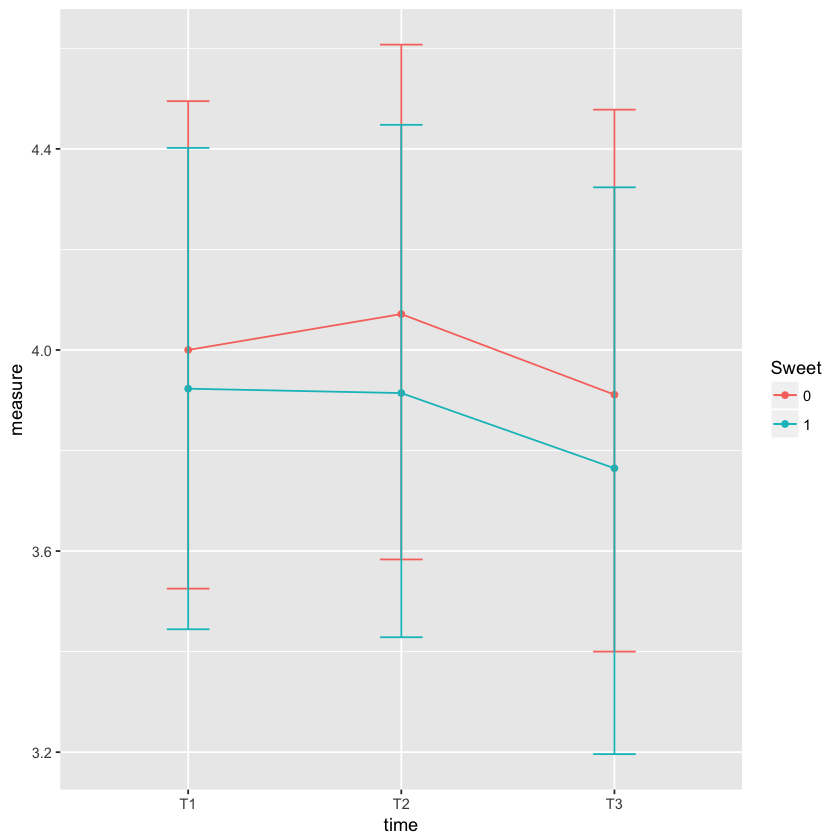

Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”

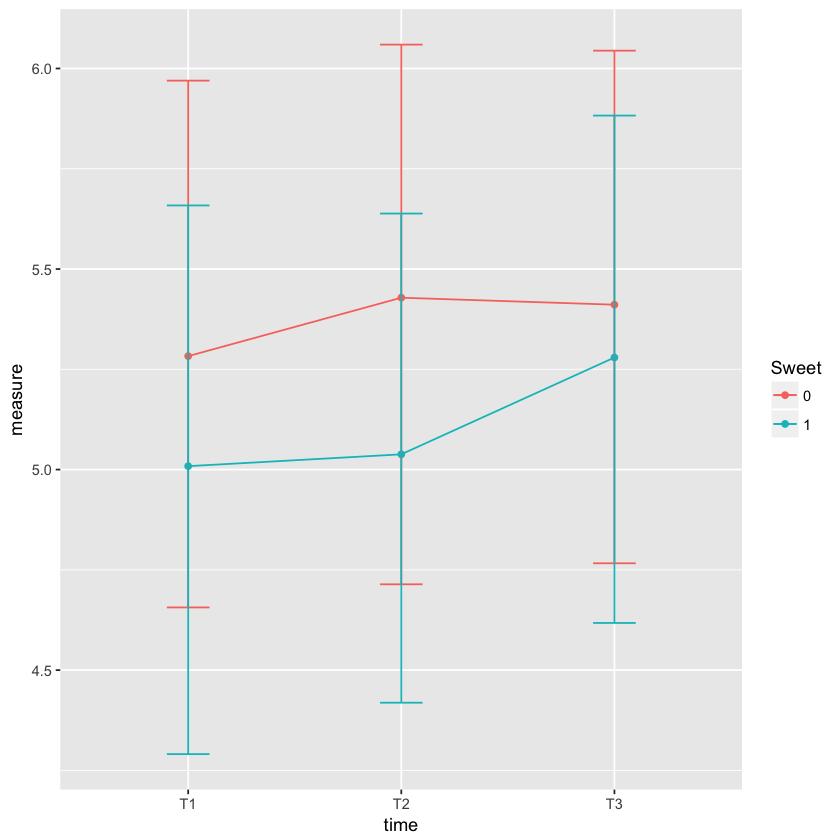

Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”

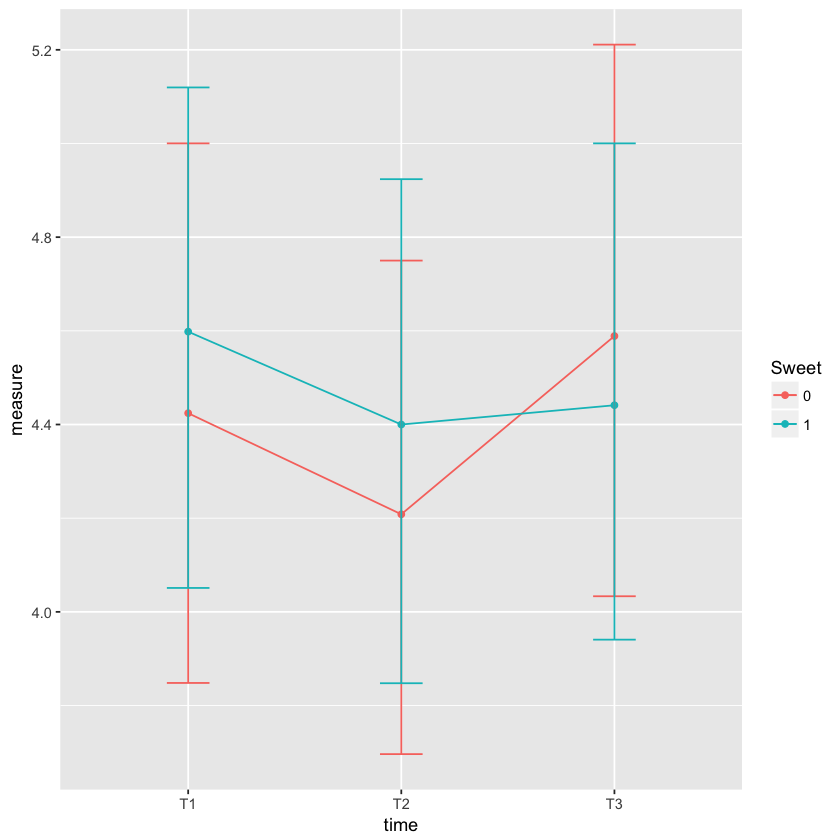

Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”Warning message:
“Removed 20 rows containing non-finite values (stat_summary).”

$aa

$ia

$sn

$bc

$bi


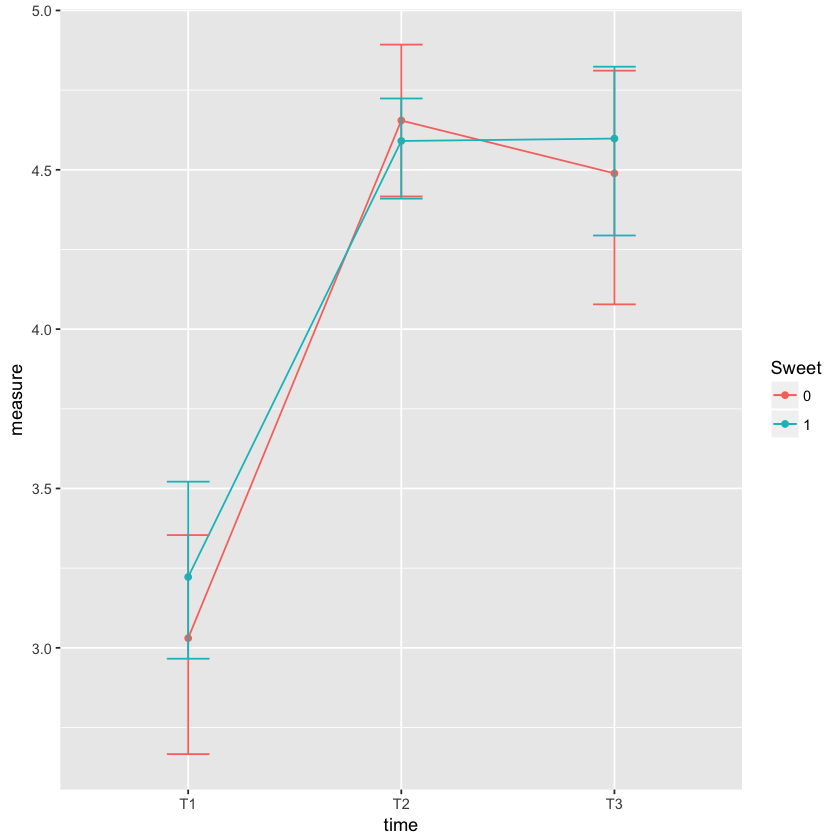

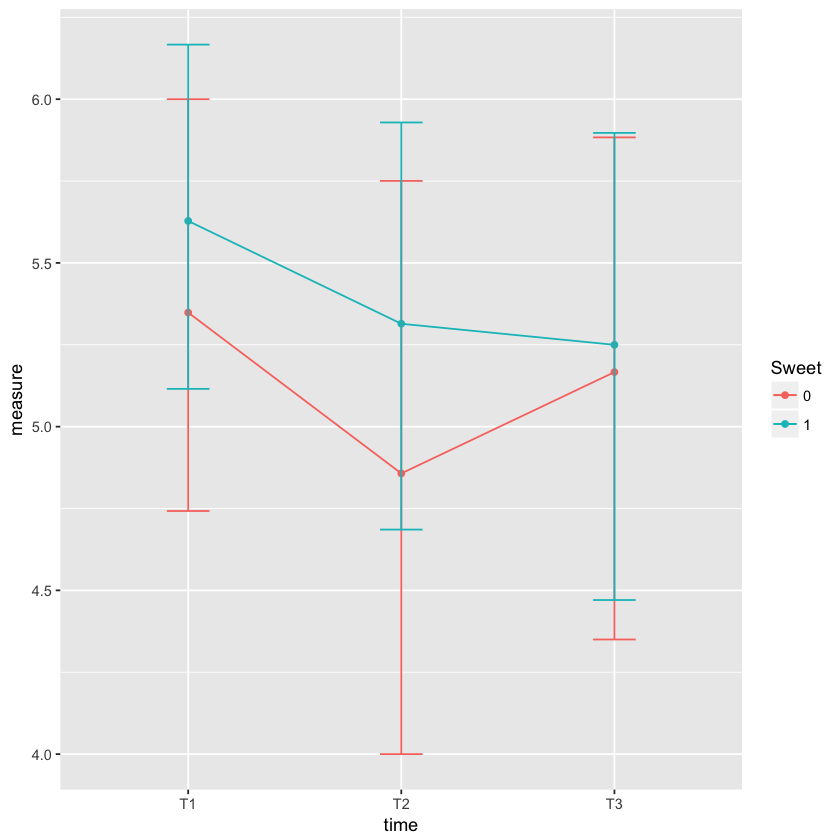

In [54]:
lapply(DL_long, plotter)

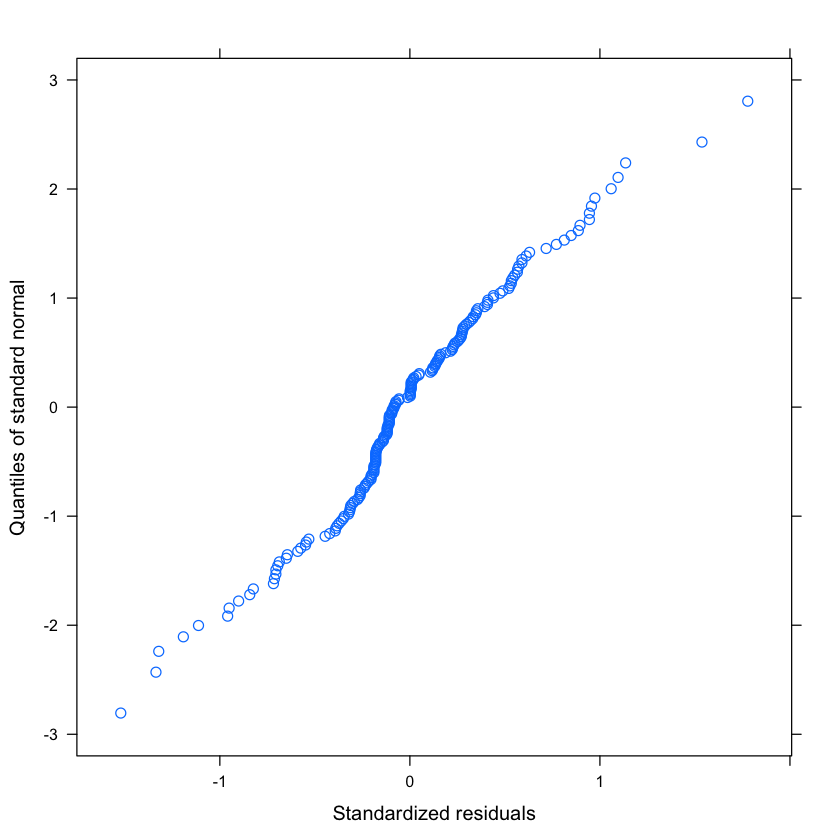

In [35]:
#fm1 <- lme(distance ~ age, Orthodont, random = ~ age | Subject)
## normal plot of standardized residuals by gender
qqnorm(timeCov, ~ resid(., type = "p"))


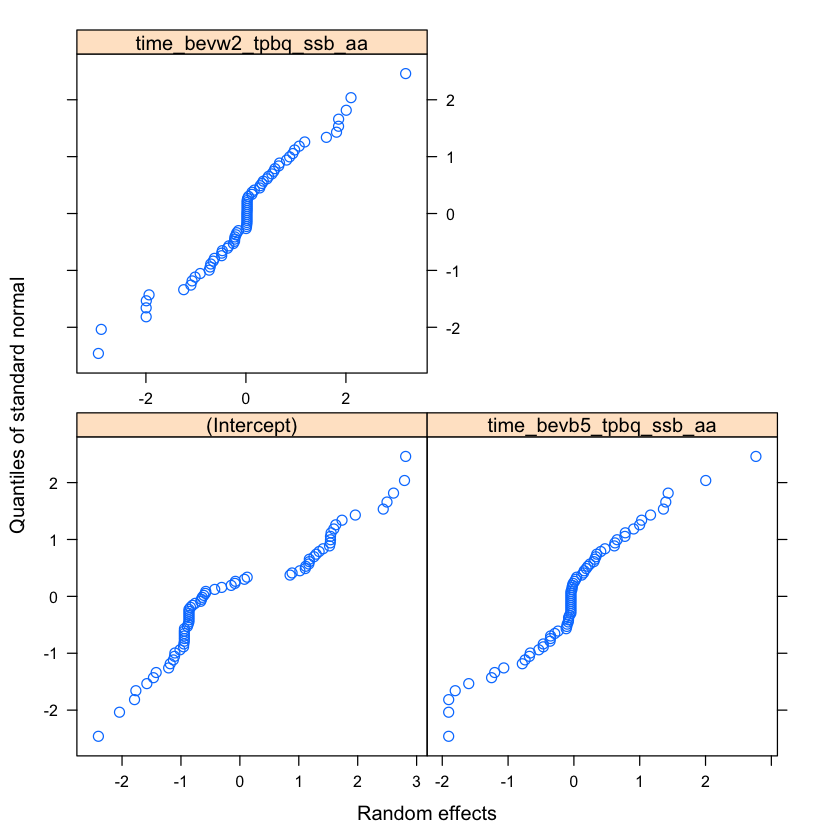

In [36]:
## normal plots of random effects
qqnorm(timeCov, ~ranef(.))


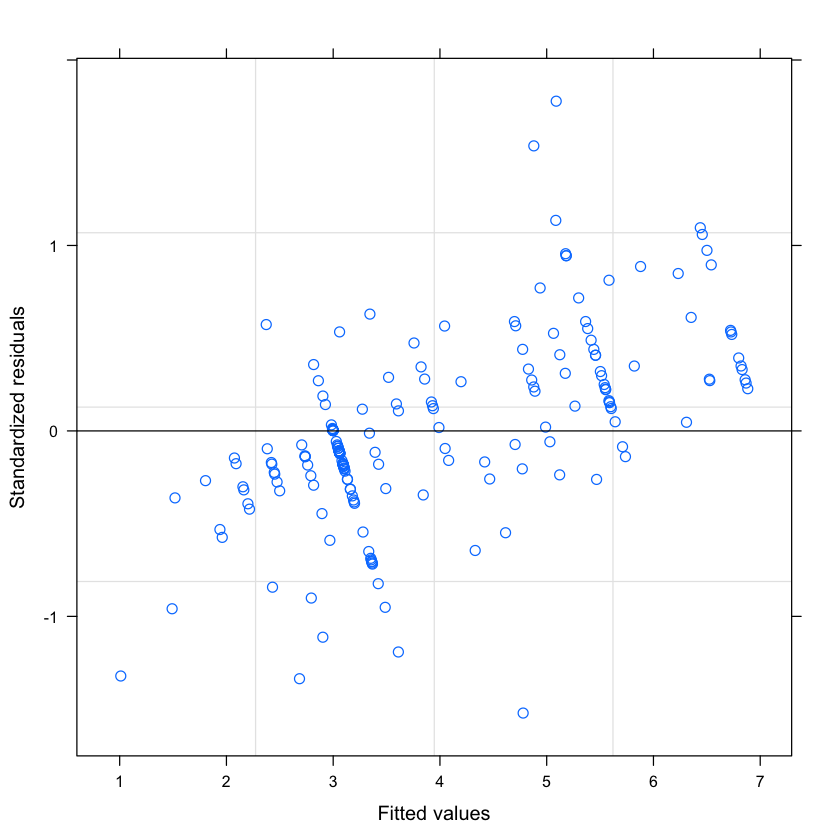

In [37]:
plot.lme(timeCov)